In [1]:
import tensorflow as tf
from tensorflow import keras # To import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar10 # dataset containing images
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Downloading the dataset into train and test
(xtrain,ytrain), (xtest,ytest) = cifar10.load_data()

In [3]:
type(xtrain)

numpy.ndarray

In [4]:
xtrain.shape    #to check the shape of train images

(50000, 32, 32, 3)

In [5]:
xtrain[10]   #looking image in np array format

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

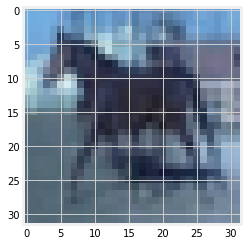

In [6]:
# to view the image
img0 = plt.imshow(xtrain[499])

In [7]:
# to get the label of the image like the image corresponding to the category
lab1=ytrain[499]
print(lab1)

[7]


In [8]:
classification = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
print('image class is:' ,classification[ytrain[499][0]])

image class is: horse


In [10]:
# changing the label into set of numbers or like np array format....
# eg if automobile means. refer classification
# we get the result like 0,1,0,0,0,0,0,0,0,0 instead of getting as automobile
# why we are changing ytrain and ytest means these are the targets of the inputs

ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [11]:
# checking
ytrain_one_hot[499]   # horse

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
# normalizing the pixel values
xtrain=xtrain/255
xtest=xtest/255

In [13]:
type(xtrain)

numpy.ndarray

In [14]:
xtrain[499]

array([[[0.42745098, 0.68235294, 0.87843137],
        [0.43137255, 0.6745098 , 0.87058824],
        [0.43921569, 0.67843137, 0.8745098 ],
        ...,
        [0.41960784, 0.63137255, 0.83137255],
        [0.45882353, 0.6745098 , 0.86666667],
        [0.47058824, 0.67058824, 0.8627451 ]],

       [[0.43137255, 0.68235294, 0.88235294],
        [0.43529412, 0.6745098 , 0.8745098 ],
        [0.44313725, 0.68235294, 0.88235294],
        ...,
        [0.42352941, 0.63137255, 0.81960784],
        [0.46666667, 0.6745098 , 0.85882353],
        [0.46666667, 0.6627451 , 0.84705882]],

       [[0.43921569, 0.68235294, 0.87843137],
        [0.43921569, 0.6745098 , 0.86666667],
        [0.44705882, 0.6745098 , 0.87058824],
        ...,
        [0.43921569, 0.64705882, 0.84313725],
        [0.44705882, 0.66666667, 0.85098039],
        [0.44705882, 0.65098039, 0.83529412]],

       ...,

       [[0.3254902 , 0.40392157, 0.45882353],
        [0.32156863, 0.39607843, 0.45098039],
        [0.31764706, 0

# Creating Model

In [15]:
# create architecture
model=Sequential()
# first conv layer
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3))) # relu means rectified linear activation function to bring as nonlinear 
# and 32,32,3  this 3 because my data is rgb colours
# create pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# second conv
model.add(Conv2D(32,(5,5), activation='relu'))
# pooling layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())
# add a layer
model.add(Dense(1000,activation='relu'))
# add dropout layer
model.add(Dropout(0.5))

# add a layer
model.add(Dense(500,activation='relu'))
# add dropout layer
model.add(Dropout(0.5))

# add a layer
model.add(Dense(250,activation='relu'))

# add a layer
model.add(Dense(10,activation='softmax')) # this 10 because there are 10 classifications
# incase of two like raja or rani we must use 1(one neuron) and activation is sigmoid
# we are using softmax because of multiple type of classification

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)              8

In [17]:
# categorical crossentropy because to compare the targets of train and test in loss function and this cc loss fn becahse my data is one hot encoded
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#optimizer because to make equal predicted target and already targeted 
# And to perform some neuron actions like changing weight and bias to get correct output

In [18]:
tr=model.fit(xtrain,ytrain_one_hot, batch_size=256, epochs=21, validation_split=0.2)
# epoch is 1 beacuse our data in training only one time
# batch is 256... for every one time epoch 256 data will train


Epoch 1/21
157/157 [==============================] - 18s 105ms/step - loss: 1.7642 - accuracy: 0.3391 - val_loss: 1.5905 - val_accuracy: 0.4229
Epoch 2/21
157/157 [==============================] - 20s 125ms/step - loss: 1.4221 - accuracy: 0.4824 - val_loss: 1.3519 - val_accuracy: 0.5098
Epoch 3/21
157/157 [==============================] - 21s 132ms/step - loss: 1.2638 - accuracy: 0.5432 - val_loss: 1.1470 - val_accuracy: 0.5973
Epoch 4/21
157/157 [==============================] - 22s 139ms/step - loss: 1.1442 - accuracy: 0.5895 - val_loss: 1.0991 - val_accuracy: 0.6104
Epoch 5/21
157/157 [==============================] - 18s 116ms/step - loss: 1.0505 - accuracy: 0.6273 - val_loss: 1.0541 - val_accuracy: 0.6346
Epoch 6/21
157/157 [==============================] - 21s 133ms/step - loss: 0.9653 - accuracy: 0.6586 - val_loss: 0.9609 - val_accuracy: 0.6577
Epoch 7/21
157/157 [==============================] - 20s 128ms/step - loss: 0.8845 - accuracy: 0.6868 - val_loss: 0.9926 - val_ac

In [19]:
# now test 
model.evaluate(xtest, ytest_one_hot)

313/313 [==============================] - 4s 12ms/step - loss: 1.0340 - accuracy: 0.7020


[1.033992052078247, 0.7020000219345093]

In [20]:
# prediction
cat1=plt.imread('cat.jpg')
cat1

array([[[162, 117, 111],
        [161, 116, 110],
        [161, 116, 110],
        ...,
        [164, 181, 199],
        [165, 182, 200],
        [165, 182, 200]],

       [[162, 117, 111],
        [160, 115, 109],
        [160, 115, 109],
        ...,
        [163, 180, 198],
        [163, 180, 198],
        [163, 180, 198]],

       [[163, 118, 112],
        [162, 117, 111],
        [162, 117, 111],
        ...,
        [162, 179, 197],
        [162, 179, 197],
        [162, 179, 197]],

       ...,

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 44,  44,  44],
        ...,
        [ 39,  55,  71],
        [ 40,  56,  72],
        [ 40,  56,  72]],

       [[ 39,  39,  39],
        [ 39,  39,  39],
        [ 38,  38,  38],
        ...,
        [ 40,  56,  72],
        [ 40,  56,  72],
        [ 40,  56,  72]],

       [[ 35,  35,  35],
        [ 35,  35,  35],
        [ 35,  35,  35],
        ...,
        [ 41,  54,  71],
        [ 40,  53,  70],
        [ 40,  53,  70]]

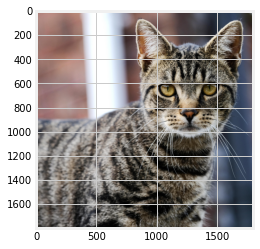

In [21]:
cat_img = plt.imshow(cat1)

In [22]:
# this image is big in size we have to convert as 32*32
# to resize the image
from skimage import transform

In [23]:
resize = transform.resize(cat1,(32,32,3))

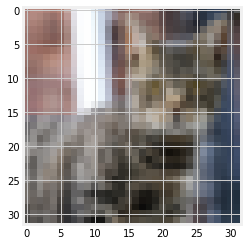

In [24]:
cat_img = plt.imshow(resize)

In [25]:
cat_pred = model.predict(np.array([resize]))
cat_pred

1/1 [==============================] - 0s 128ms/step


array([[3.7348866e-05, 1.8905492e-05, 4.3457905e-03, 8.2813579e-01,
        1.9399079e-03, 1.2984876e-01, 1.4470586e-03, 3.3970319e-02,
        2.4154402e-05, 2.3198876e-04]], dtype=float32)

In [26]:
# to confirm the result
list_index = [0,1,2,3,4,5,6,7,8,9]
x=cat_pred
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[3, 5, 7, 2, 4, 6, 9, 0, 8, 1]


In [27]:
for i in range(5):
    print(classification[list_index[i]])

cat
dog
horse
bird
deer


In [28]:
classification

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [29]:
# alternate way 
list_indexx=[0,1,2,3,4,5,6,7,8,9]
x=cat_pred
list_indexx.sort(key=lambda i:x[0][i], reverse=True)
print(list_indexx)

[3, 5, 7, 2, 4, 6, 9, 0, 8, 1]


#We have created our model with 70% accuracy. As we changing the epochs and batch size values we may get better model with more accuracy.
